In [18]:
# Import data handling & numerical libraries
import pandas as pd
import numpy as np
from copy import copy
import datetime
from sklearn.model_selection import train_test_split

# Import Data Visualization libraries
import seaborn as sb
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('train.csv')
df_test1 = pd.read_csv('test.csv')
df.head(2)

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.2,95436.8,758.880,48.375,2.0,17.8275
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.2,95436.8,762.069,47.808,2.0,18.1207


In [29]:
def make_lags(ts, lags, start):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(start, lags + 1)
        },
        axis=1)
X = make_lags(df['Meteo_Sun_irradiance'], lags=25, start = 15)
X

,y_lag_15,y_lag_16,y_lag_17,y_lag_18,y_lag_19,y_lag_20,y_lag_21,y_lag_22,y_lag_23,y_lag_24,y_lag_25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2759,-3.64267,-3.70800,-3.64267,-3.51200,-3.70800,-3.57733,-3.83867,-3.90400,-3.83867,-3.64267,-3.77333
2760,-3.83867,-3.64267,-3.70800,-3.64267,-3.51200,-3.70800,-3.57733,-3.83867,-3.90400,-3.83867,-3.64267
2761,-3.70800,-3.83867,-3.64267,-3.70800,-3.64267,-3.51200,-3.70800,-3.57733,-3.83867,-3.90400,-3.83867
2762,-3.70800,-3.70800,-3.83867,-3.64267,-3.70800,-3.64267,-3.51200,-3.70800,-3.57733,-3.83867,-3.90400


In [30]:
X['Indoor_temperature_room'] = df['Indoor_temperature_room']
X.loc[25:, :].corr()['Indoor_temperature_room'].sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_19                   0.586102
y_lag_18                   0.585009
y_lag_20                   0.584844
y_lag_17                   0.581405
Name: Indoor_temperature_room, dtype: float64

In [31]:
z = make_lags(df['Lighting_room'], lags=25, start = 15)
z = z.fillna(0)
z['Indoor_temperature_room'] = df['Indoor_temperature_room']
z.loc[25:, :].corr()['Indoor_temperature_room'].sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_21                   0.536779
y_lag_20                   0.536029
y_lag_22                   0.535330
y_lag_19                   0.532963
Name: Indoor_temperature_room, dtype: float64

In [32]:
z = make_lags(df['Meteo_Wind'], lags=50, start = 1)
z = z.fillna(0)
z['Indoor_temperature_room'] = df['Indoor_temperature_room']
abs(z.loc[25:, :].corr()['Indoor_temperature_room']).sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_12                   0.365277
y_lag_11                   0.364461
y_lag_13                   0.364135
y_lag_10                   0.361828
Name: Indoor_temperature_room, dtype: float64

In [33]:
df_train1 = df.copy()
df_test = df_test1.copy()
df_train_test=pd.concat([df.drop(['Indoor_temperature_room'],axis=1),df_test1],ignore_index=True)
df_train_test

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,9690.24,12604.20,95436.80,758.880,48.3750,2.0
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,11022.00,10787.20,95436.80,762.069,47.8080,2.0
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,13960.50,9669.63,95398.60,766.251,47.4320,2.0
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,18511.20,9648.13,95360.30,766.037,47.0240,2.0
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,26349.00,9208.32,95354.90,762.743,45.4743,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,4132,02/05/2012,06:30,199.424,201.963,43.0160,44.9813,21.8500,24.3493,0.0,617.067,0.295333,6636.54,35671.40,7454.38,124.496,58.9920,3.0
4133,4133,02/05/2012,06:45,199.200,202.091,43.1920,44.9413,21.1653,30.9693,0.0,618.133,0.174000,11818.30,71188.50,12526.90,256.597,58.6213,3.0
4134,4134,02/05/2012,07:00,199.435,201.739,43.3947,44.9333,21.2640,32.1933,0.0,619.285,0.246000,10836.30,69498.20,12597.90,281.568,57.6960,3.0
4135,4135,02/05/2012,07:15,200.107,200.597,43.3440,44.7013,28.1647,38.3507,0.0,620.139,0.181333,11722.10,79102.00,15796.90,354.645,56.8613,3.0


In [35]:
def preprocss_data(df):
    df1 = df.copy()
    df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
    df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

    df1['DateTime'] = df1['Date'] + ' ' + df1['Time']
    df1['DateTime'] = pd.to_datetime(df1['DateTime'])
    df1.drop(['Date','Time'], axis = 1, inplace = True)
    
    from fastai.tabular.core import add_datepart
    # make a Date copy because "add_datepart" do delete the orginal formatted Date.
    #In other words, the function transfer the column to Date Parts
    df_formatted = df1.copy()
    df_formatted['Formatted Date'] = df_formatted["DateTime"]
    df_formatted = add_datepart(df_formatted, 'Formatted Date')
    df_formatted.head()
    
    def hours2timing(x):
        if x in [22,23,0,1,2,3]:
            timing = 'Night'
        elif x in range(4, 12):
            timing = 'Morning'
        elif x in range(12, 17):
            timing = 'Afternoon'
        elif x in range(17, 22):
            timing = 'Evening'
        else:
            timing = 'X'
        return timing

    df_formatted['hour'] = df_formatted['DateTime'].apply(lambda x : x.hour)
    df_formatted['timing'] = df_formatted['hour'].apply(hours2timing)
    timing = df_formatted[['timing']]
    
    
    #OrdinalEncoder from scikit learn, which allows multi-column encoding 
    # It can be used to convert categorical features in numerical data type.
    from sklearn.preprocessing import OrdinalEncoder
    for i in df_formatted.select_dtypes(['object', 'bool']).columns:
        Oe = OrdinalEncoder().fit(df_formatted[[i]])
        df_formatted[i] = Oe.transform(df_formatted[[i]]).astype(int)
    return  df_formatted

df_formatted_train_test = preprocss_data(df_train_test)
df_formatted_train = preprocss_data(df)
df_formatted_train

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,...,Formatted Dayofyear,Formatted Is_month_end,Formatted Is_month_start,Formatted Is_quarter_end,Formatted Is_quarter_start,Formatted Is_year_end,Formatted Is_year_start,Formatted Elapsed,hour,timing
0,0,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,...,73,0,0,0,0,0,0,1.331639e+09,11,2
1,1,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,...,73,0,0,0,0,0,0,1.331640e+09,12,0
2,2,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,...,73,0,0,0,0,0,0,1.331641e+09,12,0
3,3,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,...,73,0,0,0,0,0,0,1.331642e+09,12,0
4,4,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,...,73,0,0,0,0,0,0,1.331643e+09,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2759,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,...,102,0,0,0,0,0,0,1.334122e+09,5,2
2760,2760,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,...,102,0,0,0,0,0,0,1.334123e+09,5,2
2761,2761,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,...,102,0,0,0,0,0,0,1.334124e+09,6,2
2762,2762,191.531,193.387,41.3093,41.8107,20.9853,23.4400,0.0,615.403,0.299333,...,102,0,0,0,0,0,0,1.334125e+09,6,2


In [36]:
hr = make_lags(df_formatted_train['hour'], lags=25, start=1)
hr = hr.fillna(0)
hr['Indoor_temperature_room'] = df['Indoor_temperature_room']
hr.corr()['Indoor_temperature_room'].sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_1                    0.416555
y_lag_2                    0.413920
y_lag_3                    0.409978
y_lag_4                    0.404769
Name: Indoor_temperature_room, dtype: float64

In [37]:
timing = make_lags(df_formatted_train['timing'], lags=10, start = 1)
timing = timing.fillna(0)
timing['Indoor_temperature_room'] = df['Indoor_temperature_room']
abs(timing.corr()['Indoor_temperature_room']).sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_9                    0.477644
y_lag_8                    0.476908
y_lag_10                   0.476896
y_lag_7                    0.474767
Name: Indoor_temperature_room, dtype: float64

In [38]:
humidity = make_lags(df_formatted_train['Outdoor_relative_humidity_Sensor'], lags=25, start = 1)
humidity = humidity.fillna(0)
humidity['Indoor_temperature_room'] = df['Indoor_temperature_room']
abs(humidity.corr()['Indoor_temperature_room']).sort_values(ascending = False)[0:5]

Indoor_temperature_room    1.000000
y_lag_6                    0.568856
y_lag_7                    0.568532
y_lag_5                    0.568204
y_lag_8                    0.567245
Name: Indoor_temperature_room, dtype: float64

In [39]:
df_formatted_train_test1 = df_formatted_train_test.copy()
df_train=pd.merge(df_formatted_train_test1,df[['Id','Indoor_temperature_room']],on='Id')
df_train = df_train.fillna(method = 'bfill')
df_train

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,...,Formatted Is_month_end,Formatted Is_month_start,Formatted Is_quarter_end,Formatted Is_quarter_start,Formatted Is_year_end,Formatted Is_year_start,Formatted Elapsed,hour,timing,Indoor_temperature_room
0,0,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,...,0,0,0,0,0,0,1.331639e+09,11,2,17.8275
1,1,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,...,0,0,0,0,0,0,1.331640e+09,12,0,18.1207
2,2,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,...,0,0,0,0,0,0,1.331641e+09,12,0,18.4367
3,3,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,...,0,0,0,0,0,0,1.331642e+09,12,0,18.7513
4,4,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,...,0,0,0,0,0,0,1.331643e+09,12,0,19.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2759,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,...,0,0,0,0,0,0,1.334122e+09,5,2,20.8187
2760,2760,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,...,0,0,0,0,0,0,1.334123e+09,5,2,20.7053
2761,2761,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,...,0,0,0,0,0,0,1.334124e+09,6,2,20.5827
2762,2762,191.531,193.387,41.3093,41.8107,20.9853,23.4400,0.0,615.403,0.299333,...,0,0,0,0,0,0,1.334125e+09,6,2,20.5200


In [40]:
df_train_lag = df_train.copy()
df_train_lag['Meteo_Sun_irradiance'] = df_train_lag['Meteo_Sun_irradiance'].shift(19)
df_train_lag['Lighting_room'] = df_train_lag['Lighting_room'].shift(21)
df_train_lag['Outdoor_relative_humidity_Sensor'] = df_train_lag['Outdoor_relative_humidity_Sensor'].shift(6)
df_train_lag['Meteo_Wind'] = df_train_lag['Meteo_Wind'].shift(12)

In [41]:
corr = df_train_lag.drop(['Id', 'DateTime'], axis = 1).corr()
abs(corr['Indoor_temperature_room']).sort_values(ascending = False)[0:10]

Indoor_temperature_room             1.000000
Meteo_Sun_irradiance                0.588970
Outdoor_relative_humidity_Sensor    0.581000
Lighting_room                       0.538869
Relative_humidity_room              0.417901
hour                                0.417876
timing                              0.410144
Meteo_Wind                          0.369261
Meteo_Sun_light_in_west_facade      0.335288
Relative_humidity_(dinning-room)    0.275193
Name: Indoor_temperature_room, dtype: float64

In [42]:
print(df_formatted_train_test[['Lighting_room', 'Meteo_Sun_irradiance']].corr())

                      Lighting_room  Meteo_Sun_irradiance
Lighting_room              1.000000              0.922889
Meteo_Sun_irradiance       0.922889              1.000000


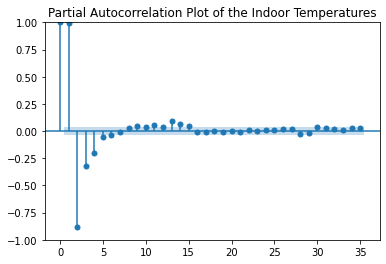

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Indoor_temperature_room'], title = "Partial Autocorrelation Plot of the Indoor Temperatures");

C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


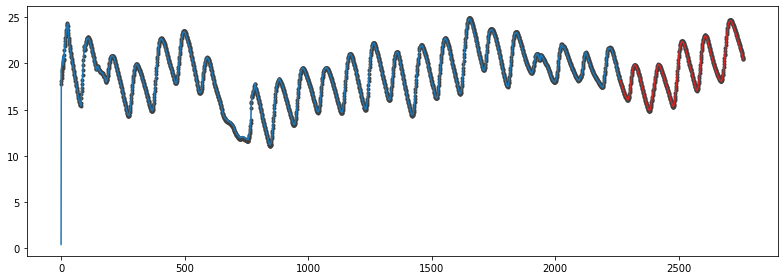

In [45]:
# Create target series and data splits
X = make_lags(df.Indoor_temperature_room, lags=8, start = 1)
X = X.fillna(0.0)

y = df.Indoor_temperature_room.copy()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

plt.rc("figure", autolayout=True, figsize=(11, 4))

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

In [48]:
X_train

,"(y_lag_1, Meteo_Sun_irradiance)","(y_lag_1, hour)","(y_lag_1, Outdoor_relative_humidity_Sensor)","(y_lag_2, Meteo_Sun_irradiance)","(y_lag_2, hour)","(y_lag_2, Outdoor_relative_humidity_Sensor)","(y_lag_3, Meteo_Sun_irradiance)","(y_lag_3, hour)","(y_lag_3, Outdoor_relative_humidity_Sensor)","(y_lag_4, Meteo_Sun_irradiance)",...,"(y_lag_8, hour)","(y_lag_8, Outdoor_relative_humidity_Sensor)",y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8
0,0.00000,0.0,0.0000,0.00000,0.0,0.0000,0.00000,0.0,0.0000,0.00000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
1,758.88000,11.0,48.3750,0.00000,0.0,0.0000,0.00000,0.0,0.0000,0.00000,...,0.0,0.0000,17.8275,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
2,762.06900,12.0,47.8080,758.88000,11.0,48.3750,0.00000,0.0,0.0000,0.00000,...,0.0,0.0000,18.1207,17.8275,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
3,766.25100,12.0,47.4320,762.06900,12.0,47.8080,758.88000,11.0,48.3750,0.00000,...,0.0,0.0000,18.4367,18.1207,17.8275,0.0000,0.000,0.0000,0.0000,0.0000
4,766.03700,12.0,47.0240,766.25100,12.0,47.4320,762.06900,12.0,47.8080,758.88000,...,0.0,0.0000,18.7513,18.4367,18.1207,17.8275,0.000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,-3.25067,0.0,76.7627,-3.44667,0.0,76.6000,-3.64267,23.0,76.2720,-3.38133,...,22.0,75.3840,18.6000,18.6800,18.7500,18.8240,18.890,19.0353,19.1407,19.2500
2260,-3.51200,0.0,76.8667,-3.25067,0.0,76.7627,-3.44667,0.0,76.6000,-3.64267,...,22.0,74.9147,18.4907,18.6000,18.6800,18.7500,18.824,18.8900,19.0353,19.1407
2261,-3.18533,0.0,76.8907,-3.51200,0.0,76.8667,-3.25067,0.0,76.7627,-3.44667,...,23.0,75.2427,18.4300,18.4907,18.6000,18.6800,18.750,18.8240,18.8900,19.0353
2262,-3.31600,1.0,77.2587,-3.18533,0.0,76.8907,-3.51200,0.0,76.8667,-3.25067,...,23.0,75.5733,18.3520,18.4300,18.4907,18.6000,18.680,18.7500,18.8240,18.8900


In [47]:
ts = df_train[['Meteo_Sun_irradiance', 'hour', 'Outdoor_relative_humidity_Sensor']]
# Create three lags for each search term
X0 = make_lags(ts, lags=8, start=1)

# Create four lags for the target, as before
X1 = make_lags(df_train['Indoor_temperature_room'], lags=8, start=1)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

TypeError: Cannot cast Index to dtype <U0